# HER2 Status

# Imports

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel("/content/sample_data/BCDexcel.xlsx")

In [ ]:
data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [ ]:
data.drop(['Patient ID','Sample ID','Integrative Cluster'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

Study ID                          0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

In [ ]:
data['HER2 Status'].value_counts()

Negative    958
Positive    134
Name: HER2 Status, dtype: int64

In [ ]:
data.duplicated().sum()

0

# Spliting the Data

In [ ]:
x=data.drop('HER2 Status',axis=1)
y=data['HER2 Status']

# Label Encoder

In [ ]:
x=x.apply(LabelEncoder().fit_transform)
y=LabelEncoder().fit_transform(y)

# Feature Scale

In [ ]:
x=StandardScaler().fit_transform(x)

# Splitting Training and Testing Dataset (not required)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

# Training the Model

In [ ]:
def balance_data(X, y):
    # Random oversampling to balance the data distribution
    ros = RandomOverSampler(random_state=42)
    X_balanced, y_balanced = ros.fit_resample(X, y)
    return X_balanced, y_balanced

def repeated_distribution_optimally_balanced_scv(X, y, k, r, model):
    performance_metrics = []

    for _ in range(r):
        # Shuffle the data to introduce randomness
        X, y = shuffle(X, y, random_state=42)

        # Initialize StratifiedKFold
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        fold_metrics = []

        for train_idx, test_idx in skf.split(X, y):
            # Balance the data distribution within each fold
            X_train_fold, y_train_fold = balance_data(X[train_idx], y[train_idx])

            # Train the model using X_train_fold, y_train_fold
            model.fit(X_train_fold, y_train_fold)

            # Predict on the test set
            y_pred = model.predict(X[test_idx])

            # Evaluate accuracy
            fold_accuracy = accuracy_score(y[test_idx], y_pred)
            fold_metrics.append(fold_accuracy)

        # Calculate and store the average performance metric for this iteration
        average_performance = np.mean(fold_metrics)
        performance_metrics.append(average_performance)

    # Calculate and report the overall performance
    overall_performance = np.mean(performance_metrics)
    return overall_performance

In [ ]:
model_RF = RandomForestClassifier()  # Replace with your chosen model
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_RF)

print("Overall Performance:", overall_performance)

Overall Performance: 0.9639244271291526


In [ ]:
pred=model_RF.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9908424908424909
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       958
           1       0.96      0.97      0.96       134

    accuracy                           0.99      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.99      0.99      0.99      1092



In [ ]:
# auc scores
auc_score1 = roc_auc_score(y, pred)
print(auc_score1)

0.9819431028573209


In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y, pred, pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

<ipython-input-65-176a2f08748f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


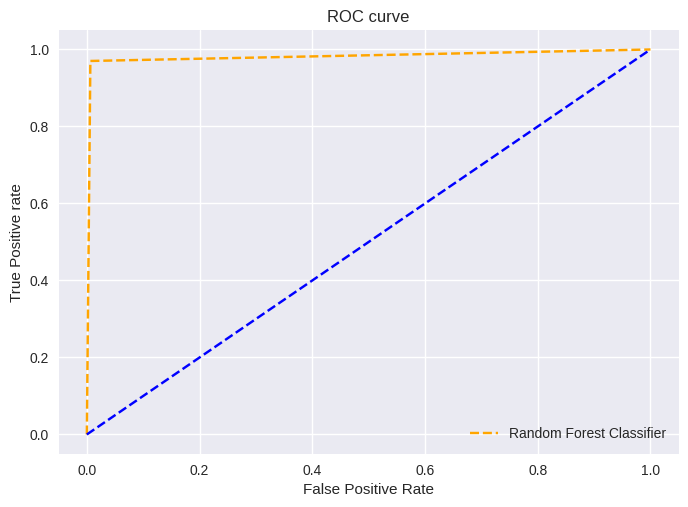

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_RF',dpi=300)
plt.show();

In [ ]:
model_l1=LogisticRegression()
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_l1)

print("Overall Performance:", overall_performance)

Overall Performance: 0.9357253571278958


In [ ]:
pred=model_l1.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.71      0.98      0.82       134

    accuracy                           0.95      1092
   macro avg       0.85      0.96      0.90      1092
weighted avg       0.96      0.95      0.95      1092



In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_knn)

print("Overall Performance:", overall_performance)

Overall Performance: 0.9078806920531189


In [ ]:
pred=model_knn.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9322344322344323
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       958
           1       0.65      0.97      0.78       134

    accuracy                           0.93      1092
   macro avg       0.82      0.95      0.87      1092
weighted avg       0.95      0.93      0.94      1092



In [ ]:
model_dt=DecisionTreeClassifier(criterion = "entropy",random_state=20)
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_dt)

print("Overall Performance:", overall_performance)

Overall Performance: 0.9410355661681539


In [ ]:
pred=model_dt.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9844322344322345
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       958
           1       0.94      0.93      0.94       134

    accuracy                           0.98      1092
   macro avg       0.97      0.96      0.96      1092
weighted avg       0.98      0.98      0.98      1092



In [ ]:
model_svc=SVC(kernel="rbf", gamma=0.5, C=1.0)
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_svc)

print("Overall Performance:", overall_performance)

Overall Performance: 0.8789392987306774


In [ ]:
pred=model_svc.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9752747252747253
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       958
           1       1.00      0.80      0.89       134

    accuracy                           0.98      1092
   macro avg       0.99      0.90      0.94      1092
weighted avg       0.98      0.98      0.97      1092



In [ ]:
model_gnb=GaussianNB()
k=5
r=5
overall_performance = repeated_distribution_optimally_balanced_scv(x, y, k, r, model_gnb)

print("Overall Performance:", overall_performance)

Overall Performance: 0.9069699635541033


In [ ]:
pred=model_gnb.predict(x)
Accuracy=metrics.accuracy_score(y, pred)
print ("Accuracy = ", Accuracy)
print(metrics.classification_report(y, pred))

Accuracy =  0.9084249084249084
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       958
           1       0.57      0.98      0.72       134

    accuracy                           0.91      1092
   macro avg       0.79      0.94      0.83      1092
weighted avg       0.94      0.91      0.92      1092

